In [1]:
import pandas as pd
data = pd.read_csv("../content/heart_small.csv")

In [2]:
from sklearn.model_selection import train_test_split
X = data.drop('heart disease', axis=1)
y = data['heart disease']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=1)

In [3]:
import xgboost as xgb

In [4]:
xgb_heart=xgb.XGBClassifier(objective= 'binary:logistic', random_state=1)
xgb_heart.fit(X_train, y_train)
y_pred=xgb_heart.predict(X_test)

In [5]:
xgb_heart.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 1,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5185185185185185


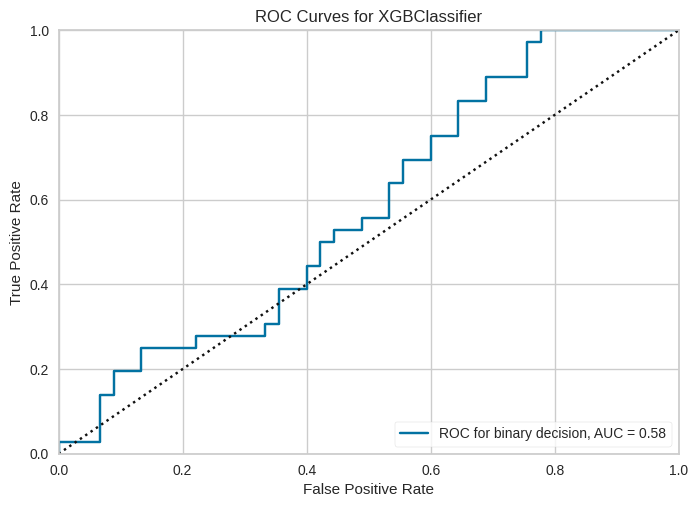

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [7]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(xgb_heart, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

In [8]:
param_grid = {
    'max_depth': [1, 2, 4, 6],
    'learning_rate': [0.01, 0.1, 1.0],
    'n_estimators': [50, 100, 200]
}

In [9]:
from sklearn.model_selection import GridSearchCV
grid_search_xgb = GridSearchCV(xgb_heart, param_grid, cv=5)
grid_search_xgb.fit(X_train,y_train)


/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
xgb_heart2=xgb.XGBClassifier( learning_rate =0.1, n_estimators=10, max_depth=4,
 min_child_weight=6, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,random_state=1)
xgb_heart2.fit(X_train, y_train)
xgb_heart2.score(X_test,y_test)


0.5925925925925926

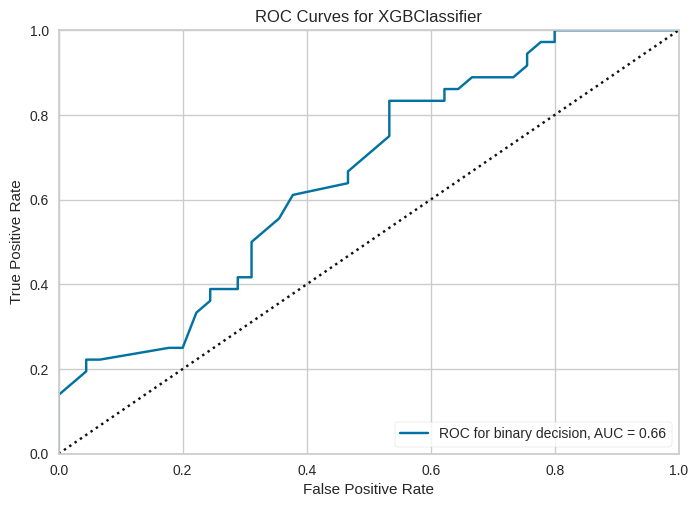

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(xgb_heart2, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

* max_depth - this should be between 3-10.
* min_child_weight - a smaller value is chosen because it is a highly imbalanced class problem, and leaf nodes can have smaller size groups.
* gamma - a smaller value like 0.1-0.2 can also be chosen for starting.
* subsample, colsample_bytree = 0.8: This is a commonly used start value. Typical values range between 0.5-0.9.
* scale_pos_weight = 1 - because of high-class imbalance.

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.0
